In [26]:
#data process
import traceback

import pandas as pd
import sqlite3
from tqdm import trange

##### 连接数据库pisa31.db，获取全部的学生数据dfs
##### connect database file pisa31.db, to get all student data dfs

In [43]:
# decision tree for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
import numpy as np
import pandas as pd
import sqlite3
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,r2_score

conn = sqlite3.connect('./pisa31.db')
dfs=pd.read_sql_query("SELECT * FROM student",conn)#全部数据

conn.close()


In [44]:

print(dfs.describe())
print(dfs)
print(len(dfs))



           CNTSTUID      CNTSCHID        CNTRYID         gender           gmc  \
count  5.850200e+05  5.850200e+05  585020.000000  585020.000000  585020.00000   
mean   4.486594e+07  4.485922e+07     448.587758       0.501366       2.72149   
std    2.701905e+07  2.701821e+07     270.178407       0.499999       1.68140   
min    8.000010e+05  8.000020e+05       8.000000       0.000000       1.00000   
25%    2.030437e+07  2.030018e+07     203.000000       0.000000       2.00000   
50%    4.220355e+07  4.220018e+07     422.000000       1.000000       2.00000   
75%    7.020712e+07  7.020016e+07     702.000000       1.000000       3.00000   
max    9.832912e+07  9.830081e+07     983.000000       1.000000       9.00000   

               math2          math5          math9          read2  \
count  585020.000000  585020.000000  585020.000000  585020.000000   
mean      457.379403     457.437811     457.331525     462.308180   
std       107.956347     107.863150     107.957406     104.4327

In [46]:
import traceback

import pandas as pd
import sqlite3
from tqdm import trange

##### 从csv中获取国家层的数据
##### get countries' layer data from csv file

In [47]:
dfn = pd.read_csv('nation.csv', sep=',', encoding='utf8')

In [48]:
print(type(dfn))
print(type(dfs))


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [49]:
print(dfn.head())
print(dfs.head())

             country  CNT CNTRYID Gini2018 GII2018      GDP2018
0            algeria  DZA                           4142.018558
1    B-S-J-Z (China)                                           
2  Baku (Azerbaijan)                                           
3     Chinese Taipei                                           
4          Hong Kong                                           
   CNTSTUID  CNTSCHID  CNTRYID  gender    ESCS  gmc    math2    math5  \
0    800251    800002        8       1  0.6747  4.0  366.610  354.077   
1    800402    800002        8       1 -0.7566  1.0  425.045  447.108   
2    801902    800002        8       0 -2.5112  3.0  320.458  349.492   
3    803546    800002        8       1 -3.1843  2.0  417.751  376.414   
4    804776    800002        8       1 -1.7557  4.0  331.580  358.006   

     math9    read2    read5    read9    scie2    scie5    scie9  
0  376.772  463.503  465.602  496.330  395.722  405.988  430.411  
1  414.376  428.730  583.114  480.550  478.

##### 将国家层数据不全的记录删除，并更正其数据类型
##### clean the countries data and modify the data type

In [50]:

print(len(dfn))
for i in range(len(dfn)):
    if dfn['CNTRYID'][i] == ' ':
        dfn = dfn.drop([i])
    elif dfn['Gini2018'][i]== ' ':
        dfn = dfn.drop([i])
    elif dfn['GII2018'][i]== ' ':
        dfn = dfn.drop([i])
    elif dfn['GDP2018'][i]== ' ':
        dfn = dfn.drop([i])

print(len(dfn))

83
60


In [51]:
dfn['CNTRYID'] = dfn['CNTRYID'].astype(int)
dfn['Gini2018'] = dfn['Gini2018'].astype(float)
dfn['GII2018'] = dfn['GII2018'].astype(float)
dfn['GDP2018'] = dfn['GDP2018'].astype(float)
#df = pd.merge(dfs,dfn, how= 'outer', on='CNTRYID')
print(dfn.head())

      country  CNT  CNTRYID  Gini2018  GII2018       GDP2018
8     Albania  ALB        8      30.1    0.234   5287.663694
9   Argentina  ARG       32      41.3    0.354  11795.159390
10  Australia  AUS       36      34.3    0.103  57180.779400
11    Austria  AUT       40      30.8    0.073  51461.433220
12    Belgium  BEL       56      27.2    0.045  47519.553100


##### 将表示学生数据的dfs和表示国家数据的dfn以外接方式合并，关键字是CNTRYID,获得总体数据df
##### outer join the students data and the countries data to merge the data , the relationship keywords is CNTRYID

In [52]:
df = pd.merge(dfs,dfn, how= 'outer', on='CNTRYID')
print(len(df))
print(df.head())

585022
   CNTSTUID  CNTSCHID  CNTRYID  gender    ESCS  gmc    math2    math5  \
0  800251.0  800002.0        8     1.0  0.6747  4.0  366.610  354.077   
1  800402.0  800002.0        8     1.0 -0.7566  1.0  425.045  447.108   
2  801902.0  800002.0        8     0.0 -2.5112  3.0  320.458  349.492   
3  803546.0  800002.0        8     1.0 -3.1843  2.0  417.751  376.414   
4  804776.0  800002.0        8     1.0 -1.7557  4.0  331.580  358.006   

     math9    read2    read5    read9    scie2    scie5    scie9  country  \
0  376.772  463.503  465.602  496.330  395.722  405.988  430.411  Albania   
1  414.376  428.730  583.114  480.550  478.235  435.355  406.212  Albania   
2  365.488  428.135  471.794  484.671  410.561  404.971  427.536  Albania   
3  428.833  409.060  419.955  450.299  441.787  410.254  470.257  Albania   
4  326.721  520.383  494.014  442.115  427.988  378.056  376.406  Albania   

   CNT  Gini2018  GII2018      GDP2018  
0  ALB      30.1    0.234  5287.663694  
1  ALB   

In [53]:
print(df.head())
df.describe()

   CNTSTUID  CNTSCHID  CNTRYID  gender    ESCS  gmc    math2    math5  \
0  800251.0  800002.0        8     1.0  0.6747  4.0  366.610  354.077   
1  800402.0  800002.0        8     1.0 -0.7566  1.0  425.045  447.108   
2  801902.0  800002.0        8     0.0 -2.5112  3.0  320.458  349.492   
3  803546.0  800002.0        8     1.0 -3.1843  2.0  417.751  376.414   
4  804776.0  800002.0        8     1.0 -1.7557  4.0  331.580  358.006   

     math9    read2    read5    read9    scie2    scie5    scie9  country  \
0  376.772  463.503  465.602  496.330  395.722  405.988  430.411  Albania   
1  414.376  428.730  583.114  480.550  478.235  435.355  406.212  Albania   
2  365.488  428.135  471.794  484.671  410.561  404.971  427.536  Albania   
3  428.833  409.060  419.955  450.299  441.787  410.254  470.257  Albania   
4  326.721  520.383  494.014  442.115  427.988  378.056  376.406  Albania   

   CNT  Gini2018  GII2018      GDP2018  
0  ALB      30.1    0.234  5287.663694  
1  ALB      30.1

,CNTSTUID,CNTSCHID,CNTRYID,gender,gmc,math2,math5,math9,read2,read5,read9,scie2,scie5,scie9,Gini2018,GII2018,GDP2018
count,5.850200e+05,5.850200e+05,585022.000000,585020.000000,585020.00000,585020.000000,585020.000000,585020.000000,585020.000000,585020.000000,585020.000000,585020.000000,585020.000000,585020.000000,447947.000000,447947.000000,447947.000000
mean,4.486594e+07,4.485922e+07,448.587763,0.501366,2.72149,457.379403,457.437811,457.331525,462.308180,462.161543,462.139402,461.842311,461.958339,461.907718,34.413687,0.180607,28250.969288
std,2.701905e+07,2.701821e+07,270.178353,0.499999,1.68140,107.956347,107.863150,107.957406,104.432774,104.486114,104.344279,102.806852,102.682120,102.713836,6.714302,0.125065,22554.265514
min,8.000010e+05,8.000020e+05,8.000000,0.000000,1.00000,28.726000,16.891000,0.000000,25.561000,8.269000,26.576000,25.972000,28.601000,58.448000,24.600000,0.037000,2566.447487
25%,2.030437e+07,2.030018e+07,203.000000,0.000000,2.00000,379.659750,379.884000,379.737000,387.833750,387.537000,388.087000,386.543000,386.859750,386.852750,29.600000,0.078000,9454.348443
50%,4.220355e+07,4.220018e+07,422.000000,1.000000,2.00000,457.104000,457.044000,457.157000,461.859000,461.667500,461.616000,459.236500,459.407000,459.644000,34.300000,0.122000,23052.301260
75%,7.020712e+07,7.020016e+07,702.000000,1.000000,3.00000,534.479000,534.366250,534.500250,536.418000,536.541000,536.064250,534.839250,534.784250,534.726000,37.500000,0.275000,43839.324490
max,9.832912e+07,9.830081e+07,983.000000,1.000000,9.00000,898.478000,885.244000,862.252000,916.276000,915.101000,899.891000,881.367000,874.875000,883.038000,53.900000,0.460000,117197.481700


##### 对df数据进行处理，gmc不能超过4，删掉无用的列，删掉有缺失的行
##### process df data, gmc is between 0-4, delete useless columns and rows

In [54]:
for i in range(585022):
    if df['gmc'][i] >4.0:
        df['gmc'][i] = 4.0

print(len(df))

C:\Users\yz890\AppData\Local\Temp\ipykernel_41036\321980089.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gmc'][i] = 4.0


585022


In [55]:
#df = df.drop('CNTSCHID',axis=1)
df.describe()

,CNTSTUID,CNTSCHID,CNTRYID,gender,gmc,math2,math5,math9,read2,read5,read9,scie2,scie5,scie9,Gini2018,GII2018,GDP2018
count,5.850200e+05,5.850200e+05,585022.000000,585020.000000,585020.000000,585020.000000,585020.000000,585020.000000,585020.000000,585020.000000,585020.000000,585020.000000,585020.000000,585020.000000,447947.000000,447947.000000,447947.000000
mean,4.486594e+07,4.485922e+07,448.587763,0.501366,2.466731,457.379403,457.437811,457.331525,462.308180,462.161543,462.139402,461.842311,461.958339,461.907718,34.413687,0.180607,28250.969288
std,2.701905e+07,2.701821e+07,270.178353,0.499999,0.984253,107.956347,107.863150,107.957406,104.432774,104.486114,104.344279,102.806852,102.682120,102.713836,6.714302,0.125065,22554.265514
min,8.000010e+05,8.000020e+05,8.000000,0.000000,1.000000,28.726000,16.891000,0.000000,25.561000,8.269000,26.576000,25.972000,28.601000,58.448000,24.600000,0.037000,2566.447487
25%,2.030437e+07,2.030018e+07,203.000000,0.000000,2.000000,379.659750,379.884000,379.737000,387.833750,387.537000,388.087000,386.543000,386.859750,386.852750,29.600000,0.078000,9454.348443
50%,4.220355e+07,4.220018e+07,422.000000,1.000000,2.000000,457.104000,457.044000,457.157000,461.859000,461.667500,461.616000,459.236500,459.407000,459.644000,34.300000,0.122000,23052.301260
75%,7.020712e+07,7.020016e+07,702.000000,1.000000,3.000000,534.479000,534.366250,534.500250,536.418000,536.541000,536.064250,534.839250,534.784250,534.726000,37.500000,0.275000,43839.324490
max,9.832912e+07,9.830081e+07,983.000000,1.000000,4.000000,898.478000,885.244000,862.252000,916.276000,915.101000,899.891000,881.367000,874.875000,883.038000,53.900000,0.460000,117197.481700


In [57]:
df1 = df.drop(['country','CNTRYID','CNTSTUID','CNTSCHID','CNT'],axis=1)
df1.head()

,gender,ESCS,gmc,math2,math5,math9,read2,read5,read9,scie2,scie5,scie9,Gini2018,GII2018,GDP2018
0,1.0,0.6747,4.0,366.610,354.077,376.772,463.503,465.602,496.330,395.722,405.988,430.411,30.1,0.234,5287.663694
1,1.0,-0.7566,1.0,425.045,447.108,414.376,428.730,583.114,480.550,478.235,435.355,406.212,30.1,0.234,5287.663694
2,0.0,-2.5112,3.0,320.458,349.492,365.488,428.135,471.794,484.671,410.561,404.971,427.536,30.1,0.234,5287.663694
3,1.0,-3.1843,2.0,417.751,376.414,428.833,409.060,419.955,450.299,441.787,410.254,470.257,30.1,0.234,5287.663694
4,1.0,-1.7557,4.0,331.580,358.006,326.721,520.383,494.014,442.115,427.988,378.056,376.406,30.1,0.234,5287.663694


In [58]:

print(len(df1.loc[2][:]))

for i in range(8):
    print(type(df1.loc[1][i]))

print(df1.head())
    


15
<class 'numpy.float64'>
<class 'float'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
   gender    ESCS  gmc    math2    math5    math9    read2    read5    read9  \
0     1.0  0.6747  4.0  366.610  354.077  376.772  463.503  465.602  496.330   
1     1.0 -0.7566  1.0  425.045  447.108  414.376  428.730  583.114  480.550   
2     0.0 -2.5112  3.0  320.458  349.492  365.488  428.135  471.794  484.671   
3     1.0 -3.1843  2.0  417.751  376.414  428.833  409.060  419.955  450.299   
4     1.0 -1.7557  4.0  331.580  358.006  326.721  520.383  494.014  442.115   

     scie2    scie5    scie9  Gini2018  GII2018      GDP2018  
0  395.722  405.988  430.411      30.1    0.234  5287.663694  
1  478.235  435.355  406.212      30.1    0.234  5287.663694  
2  410.561  404.971  427.536      30.1    0.234  5287.663694  
3  441.787  410.254  470.257      30.1    0.234  5287.663694  
4  427.988  378.0

In [59]:
df2 = df1
df2['gender'].replace(' ', np.nan, inplace=True)
df2['ESCS'].replace(' ', np.nan, inplace=True)
df2['gmc'].replace(' ', np.nan, inplace=True)
df2['math2'].replace(' ', np.nan, inplace=True)
df2['read2'].replace(' ', np.nan, inplace=True)
df2['math5'].replace(' ', np.nan, inplace=True)
df2['read5'].replace(' ', np.nan, inplace=True)
df2['math9'].replace(' ', np.nan, inplace=True)
df2['read9'].replace(' ', np.nan, inplace=True)
df2['scie2'].replace(' ', np.nan, inplace=True)
df2['scie5'].replace(' ', np.nan, inplace=True)
df2['scie9'].replace(' ', np.nan, inplace=True)
df2['Gini2018'].replace(' ', np.nan, inplace=True)
df2['GII2018'].replace(' ', np.nan, inplace=True)
df2['GDP2018'].replace(' ', np.nan, inplace=True)
df2.dropna(inplace=True)

In [60]:
df2['Gini2018'] = df2['Gini2018'].astype(float)
df2['GII2018'] = df2['GII2018'].astype(float)
df2['GDP2018'] = df2['GDP2018'].astype(float)


In [138]:
df1.describe()

,gender,ESCS,gmc,math2,math5,math9,read2,read5,read9,scie2,scie5,scie9,Gini2018,GII2018,GDP2018
count,444238.00000,444238.000000,444238.000000,444238.000000,444238.000000,444238.000000,444238.000000,444238.000000,444238.000000,444238.000000,444238.000000,444238.000000,444238.000000,444238.000000,444238.000000
mean,0.49934,-0.243234,2.453084,458.151882,458.146502,458.080268,461.183895,460.949128,460.840388,460.875345,461.009098,461.025529,34.418319,0.180978,28152.278925
std,0.50000,1.101132,0.983012,105.386061,105.211802,105.330841,100.561152,100.688579,100.325938,99.690425,99.516648,99.619186,6.719527,0.125171,22499.835155
min,0.00000,-7.751600,1.000000,28.726000,38.641000,27.130000,43.950000,8.269000,26.576000,69.464000,28.601000,64.461000,24.600000,0.037000,3096.817402
25%,0.00000,-0.966900,2.000000,382.299250,382.422500,382.446000,390.126000,389.675250,390.397000,388.382000,388.857000,388.786000,29.600000,0.078000,9454.348443
50%,0.00000,-0.157800,2.000000,458.292000,458.098000,458.313000,461.797500,461.681000,461.488000,459.038500,459.320000,459.659000,34.300000,0.122000,23052.301260
75%,1.00000,0.624500,3.000000,533.446000,533.154000,533.406000,532.846750,532.837000,532.337500,531.900000,531.742750,531.634000,37.500000,0.275000,43839.324490
max,1.00000,4.205100,4.000000,898.478000,867.522000,862.252000,916.276000,859.838000,899.891000,881.367000,874.875000,883.038000,53.900000,0.460000,117197.481700


In [221]:
df2.describe()

,gender,ESCS,gmc,GDP2018,GII2018,Gini2018,math2,math5,math9,read2,read5,read9,scie2,scie5,scie9
count,444238.00000,444238.000000,444238.000000,444238.000000,444238.000000,444238.000000,444238.000000,444238.000000,444238.000000,444238.000000,444238.000000,444238.000000,444238.000000,444238.000000,444238.000000
mean,0.49934,-0.243234,2.453084,28152.278925,0.180978,34.418319,458.151882,458.146502,458.080268,461.183895,460.949128,460.840388,460.875345,461.009098,461.025529
std,0.50000,1.101132,0.983012,22499.835155,0.125171,6.719527,105.386061,105.211802,105.330841,100.561152,100.688579,100.325938,99.690425,99.516648,99.619186
min,0.00000,-7.751600,1.000000,3096.817402,0.037000,24.600000,28.726000,38.641000,27.130000,43.950000,8.269000,26.576000,69.464000,28.601000,64.461000
25%,0.00000,-0.966900,2.000000,9454.348443,0.078000,29.600000,382.299250,382.422500,382.446000,390.126000,389.675250,390.397000,388.382000,388.857000,388.786000
50%,0.00000,-0.157800,2.000000,23052.301260,0.122000,34.300000,458.292000,458.098000,458.313000,461.797500,461.681000,461.488000,459.038500,459.320000,459.659000
75%,1.00000,0.624500,3.000000,43839.324490,0.275000,37.500000,533.446000,533.154000,533.406000,532.846750,532.837000,532.337500,531.900000,531.742750,531.634000
max,1.00000,4.205100,4.000000,117197.481700,0.460000,53.900000,898.478000,867.522000,862.252000,916.276000,859.838000,899.891000,881.367000,874.875000,883.038000


In [64]:
print(len(df2))

444238


In [66]:
df2 = df2[['gender','ESCS','gmc','GDP2018','GII2018','Gini2018','math2','math5','math9','read2','read5','read9','scie2','scie5','scie9']]

In [222]:
dfb = df1.loc[df1['gender']==1]#boy
dfg = df1.loc[df1['gender']==0]#girl

In [280]:
dfg.describe()

,gender,ESCS,gmc,math2,math5,math9,read2,read5,read9,scie2,scie5,scie9,Gini2018,GII2018,GDP2018
count,222412.0,222412.000000,222412.000000,222412.000000,222412.000000,222412.000000,222412.000000,222412.000000,222412.000000,222412.000000,222412.000000,222412.000000,222412.000000,222412.000000,222412.000000
mean,0.0,-0.257774,2.419708,472.708154,472.720783,472.662014,458.874279,458.600658,458.263716,462.140722,462.399062,462.508478,34.511271,0.182647,28034.294035
std,0.0,1.112980,0.946732,101.289368,100.988415,101.048380,97.607969,97.556092,97.216432,96.616575,96.300705,96.479813,6.741837,0.126107,22450.181271
min,0.0,-7.597200,1.000000,51.315000,38.641000,71.451000,44.767000,25.290000,30.813000,69.464000,28.601000,71.042000,24.600000,0.037000,3096.817402
25%,0.0,-0.990000,2.000000,400.592750,400.657000,400.956750,389.967000,389.755750,390.179750,392.498000,393.179750,393.194000,29.700000,0.081000,9454.348443
50%,0.0,-0.168500,2.000000,472.700000,472.870000,472.844500,459.936500,459.669000,459.368500,460.773500,461.210000,461.659500,34.300000,0.122000,23052.301260
75%,0.0,0.627800,3.000000,544.482000,543.966750,544.342250,528.449250,528.199250,527.529750,530.790500,530.664000,530.570750,38.400000,0.275000,43839.324490
max,0.0,4.037300,4.000000,863.429000,867.522000,862.252000,892.726000,859.838000,845.363000,835.542000,842.829000,834.501000,53.900000,0.460000,117197.481700


In [281]:
#归一化操作
from sklearn.preprocessing import Normalizer
data = Normalizer().fit_transform(df2)


In [368]:
test_corr=df1.corr()
test_corr

,gender,ESCS,gmc,math2,math5,math9,read2,read5,read9,scie2,scie5,scie9,Gini2018,GII2018,GDP2018
gender,1.000000,0.013223,0.033998,-0.138306,-0.138706,-0.138620,0.022998,0.023355,0.025717,-0.012710,-0.013986,-0.014906,-0.013851,-0.013350,0.005251
ESCS,0.013223,1.000000,-0.130858,0.417293,0.418123,0.417526,0.443792,0.443692,0.443214,0.418278,0.418303,0.418069,-0.298167,-0.404032,0.316872
gmc,0.033998,-0.130858,1.000000,-0.255230,-0.254745,-0.255423,-0.220816,-0.220165,-0.218955,-0.246267,-0.245315,-0.246054,-0.002406,0.064830,-0.031963
math2,-0.138306,0.417293,-0.255230,1.000000,0.940222,0.940106,0.817386,0.793948,0.793377,0.874346,0.847974,0.847381,-0.171625,-0.324354,0.264643
math5,-0.138706,0.418123,-0.254745,0.940222,1.000000,0.940371,0.793885,0.818039,0.794098,0.847556,0.875169,0.847662,-0.171329,-0.324272,0.264086
math9,-0.138620,0.417526,-0.255423,0.940106,0.940371,1.000000,0.793490,0.793665,0.817129,0.847397,0.848033,0.874830,-0.171180,-0.323356,0.262968
read2,0.022998,0.443792,-0.220816,0.817386,0.793885,0.793490,1.000000,0.864814,0.864340,0.832616,0.804400,0.804282,-0.260005,-0.372702,0.268143
read5,0.023355,0.443692,-0.220165,0.793948,0.818039,0.793665,0.864814,1.000000,0.864906,0.804072,0.832536,0.804104,-0.261378,-0.374322,0.272493
read9,0.025717,0.443214,-0.218955,0.793377,0.794098,0.817129,0.864340,0.864906,1.000000,0.803596,0.804167,0.832308,-0.258303,-0.369013,0.267347
scie2,-0.012710,0.418278,-0.246267,0.874346,0.847556,0.847397,0.832616,0.804072,0.803596,1.000000,0.891530,0.891221,-0.196254,-0.322721,0.251947


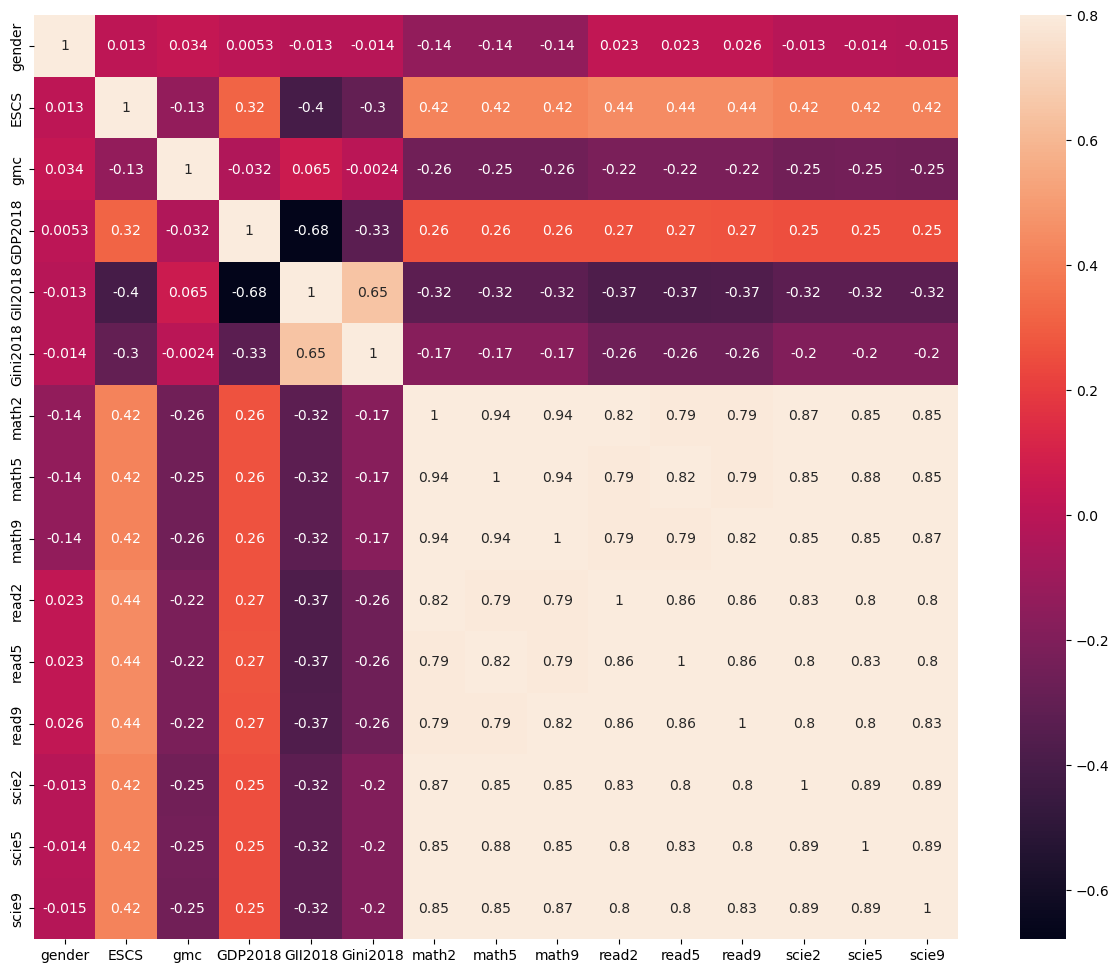

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
#绘制热力图
ax=plt.subplots(figsize=(16,12))
ax=sns.heatmap(test_corr,vmax=.8,square=True,annot=True)


##### lasso方法处理数据 Use lasso method to process data
find the best model variable


In [374]:


import numpy as np
import pandas as pd
import sqlite3
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,r2_score

from sklearn.preprocessing import MaxAbsScaler
x = dfb.values
transformer = MaxAbsScaler().fit(x)
data=transformer.transform(x)
print(len(df1))


444238


In [380]:
dfb.head()

,gender,ESCS,gmc,math2,math5,math9,read2,read5,read9,scie2,scie5,scie9,Gini2018,GII2018,GDP2018
0,1.0,0.6747,4.0,366.610,354.077,376.772,463.503,465.602,496.330,395.722,405.988,430.411,30.1,0.234,5287.663694
1,1.0,-0.7566,1.0,425.045,447.108,414.376,428.730,583.114,480.550,478.235,435.355,406.212,30.1,0.234,5287.663694
3,1.0,-3.1843,2.0,417.751,376.414,428.833,409.060,419.955,450.299,441.787,410.254,470.257,30.1,0.234,5287.663694
4,1.0,-1.7557,4.0,331.580,358.006,326.721,520.383,494.014,442.115,427.988,378.056,376.406,30.1,0.234,5287.663694
6,1.0,-3.2481,3.0,293.026,297.878,271.121,356.191,331.225,275.449,368.076,448.871,407.483,30.1,0.234,5287.663694


In [142]:
print(data[0:3,0:15])

[[ 1.          0.08704009  1.          0.40803448  0.40814757  0.43696274
   0.50585522  0.54149968  0.55154458  0.44898663  0.46405258  0.4874207
   0.55844156  0.50869565  0.04511755]
 [ 1.         -0.09760566  0.25        0.47307224  0.5153852   0.48057412
   0.46790487  0.67816728  0.53400912  0.54260597  0.49761966  0.46001644
   0.55844156  0.50869565  0.04511755]
 [ 0.         -0.32395892  0.75        0.35666761  0.40286241  0.42387608
   0.4672555   0.54870103  0.53858856  0.46582298  0.46289013  0.48416489
   0.55844156  0.50869565  0.04511755]]


In [ ]:
#抽取特征 get features
features=np.hstack((data[:,0:3],data[:,12:15]))
#features.shape
#抽取目标变量
# get target variable


x_train = features[:150000]

x_test = features[150000:]


In [376]:
print(features.shape)

print(targets_m[0])

(221826, 6)
0.5123253297479572


In [335]:
targets_m = data[:,11]

#targets_m = data[:,6]
#targets_r = data[:,9]
#targets_s = data[:,12]

In [ ]:
#先做数学成绩 compute math score first
y_train = targets_m[:150000]
y_test = targets_m[150000:]
#再做阅读成绩 compute reading score
#y_train = targets_r[:400000]
#y_test = targets_r[400000:]
#再做科学成绩 compute science score
#y_train = targets_s[:300000]
#y_test = targets_s[300000:]

In [337]:
def formatstr(fs):
    return "%.4f\t%.4f\t%.4f\t%.4f\t%.4f\t%.4f\t"%(fs[0],fs[1],fs[2],fs[3],fs[4],fs[5])
        
def lasso(alphas):
    models = []
    coefs = []
    print("alpha\t\tgender\t\tESCS\tgmc\tGini\tGII\tGdp")
    for alpha in alphas:
        reg=linear_model.Lasso(alpha=alpha,fit_intercept=True)
        reg.fit(x_train,y_train)
        y_predict=reg.predict(x_test)
        #print(reg.coef_)

        
        print("a:%.4f\tCoe:%s"%(alpha,formatstr(reg.coef_)))
        models.append(reg)
        coefs.append(reg.coef_)
    return models,coefs

a = [ 0.0083,0.0067,0.0035,0.0005,0.00001]
a.reverse()
lasso(a)

alpha		gender		ESCS	gmc	Gini	GII	Gdp
a:0.0000	Coe:0.0000	0.2688	-0.0869	-0.0343	-0.0649	0.0348	
a:0.0005	Coe:0.0000	0.2515	-0.0789	-0.0000	-0.0833	0.0179	
a:0.0035	Coe:0.0000	0.1320	-0.0394	-0.0000	-0.0877	0.0000	
a:0.0067	Coe:0.0000	0.0026	-0.0000	-0.0000	-0.0835	0.0000	
a:0.0083	Coe:0.0000	0.0000	-0.0000	-0.0000	-0.0656	0.0000	


([Lasso(alpha=1e-05),
  Lasso(alpha=0.0005),
  Lasso(alpha=0.0035),
  Lasso(alpha=0.0067),
  Lasso(alpha=0.0083)],
 [array([ 0.        ,  0.26883188, -0.08690573, -0.03434488, -0.06488088,
          0.03481781]),
  array([ 0.        ,  0.25147051, -0.07893417, -0.        , -0.08329002,
          0.01792917]),
  array([ 0.        ,  0.13204683, -0.03939126, -0.        , -0.08768449,
          0.        ]),
  array([ 0.        ,  0.00258511, -0.        , -0.        , -0.08348316,
          0.        ]),
  array([ 0.       ,  0.       , -0.       , -0.       , -0.0655603,
          0.       ])])

In [133]:
# xgboost for feature importance on a regression problem
from sklearn.datasets import make_regression
from xgboost import XGBRegressor
from matplotlib import pyplot

In [134]:
X=features
y=targets_m

In [194]:
for i in range(1,4):
    print(i)
    print('实验',df1.columns.values[i])

1
实验 ESCS
2
实验 gmc
3
实验 math2


In [210]:
list1 = []
list1.append((2,3))
list1
print(type(list1))

<class 'list'>


## xgboost method

In [ ]:
#tar = 345 math; 678 read; 9 10 11 scie
def xgboost():
    X = features
    model = XGBRegressor()
    ln = ['gender','ESCS','gmc','Gini','GII','Gdp']
    #print('女生成绩')
    for i in range(3,12):
        y = data[:,i]
        # fit the model
        model.fit(X, y)
        # get importance
        importance = model.feature_importances_
        # summarize feature importance
        
        print('实验-xgboost-因变量为',df1.columns.values[i],'时')
        li = []
        for i,v in enumerate(importance):
            li.append((ln[i],round(v,4)))
        result = sorted(li,key = lambda t:t[1],reverse=True)
        print(result)


In [381]:
xgboost()

女生成绩
实验-xgboost-因变量为 math2 时
[('gmc', 0.27222118), ('GII', 0.2371495), ('Gdp', 0.22113031), ('ESCS', 0.1555129), ('Gini', 0.11398612), ('gender', 0.0)]
实验-xgboost-因变量为 math5 时
[('gmc', 0.2716958), ('GII', 0.24961755), ('Gdp', 0.20425695), ('ESCS', 0.15998109), ('Gini', 0.11444864), ('gender', 0.0)]
实验-xgboost-因变量为 math9 时
[('gmc', 0.27551883), ('GII', 0.22852343), ('Gdp', 0.21886027), ('ESCS', 0.1532673), ('Gini', 0.12383021), ('gender', 0.0)]


KeyboardInterrupt: 

In [198]:
import operator
datafn = iter(['gender', 'ESCS', 'gmc', 'gini', 'GII', 'Gdp'])
feature_importances = list(zip(datafn, map(lambda x: round(x, 4), model.feature_importances_)))
sorted_feature_importances = sorted(feature_importances, key=operator.itemgetter(1), reverse=True)

for feature, importance in sorted_feature_importances:
    print(f"Feature: {feature}, Importance: {importance}")

Feature: GII, Importance: 0.38109999895095825
Feature: ESCS, Importance: 0.1988999992609024
Feature: gmc, Importance: 0.17870000004768372
Feature: Gdp, Importance: 0.11240000277757645
Feature: gini, Importance: 0.10899999737739563
Feature: gender, Importance: 0.01979999989271164


##### Random Forest Methods

In [378]:
from sklearn.ensemble import RandomForestRegressor
import operator
def rf():
    X = features
    rf = RandomForestRegressor()
    ln = ['gender', 'ESCS', 'gmc', 'gini', 'GII', 'Gdp']
    
    for i in range(3,12):
        y = data[:,i]
        # fit the model
        rf.fit(X, y)
        # get importance
        #feature_importances = list(zip(datafn, map(lambda x: round(x, 4), rf.feature_importances_)))
        #sorted_feature_importances = sorted(feature_importances, key=operator.itemgetter(1), reverse=True)
        # summarize feature importance
        print('实验-randomforest-因变量为',df1.columns.values[i],'时')
        li = []
        for i,v in enumerate(rf.feature_importances_):
            li.append((ln[i],round(v,4)))
        result = sorted(li,key = lambda t:t[1],reverse=True)
        print(result)
        

In [379]:
rf()

实验-randomforest-因变量为 math2 时
[('ESCS', 0.7354), ('gmc', 0.0751), ('Gdp', 0.0721), ('GII', 0.0684), ('gini', 0.049), ('gender', 0.0)]
